In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



[2025年01月11日 17时05分16秒] DEBUG    selecting waypoints                                                         
[2025年01月11日 17时05分24秒] DEBUG    selecting waypoints shape is (141, 926), finished!                          


{'id': 'synthetic/dyntoy/bifurcating_1',
 'cell_ids': ['C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'C15',
  'C16',
  'C17',
  'C18',
  'C19',
  'C20',
  'C21',
  'C22',
  'C23',
  'C24',
  'C25',
  'C26',
  'C27',
  'C28',
  'C29',
  'C30',
  'C31',
  'C32',
  'C33',
  'C34',
  'C35',
  'C36',
  'C37',
  'C38',
  'C39',
  'C40',
  'C41',
  'C42',
  'C43',
  'C44',
  'C45',
  'C46',
  'C47',
  'C48',
  'C49',
  'C50',
  'C51',
  'C52',
  'C53',
  'C54',
  'C55',
  'C56',
  'C57',
  'C58',
  'C59',
  'C60',
  'C61',
  'C62',
  'C63',
  'C64',
  'C65',
  'C66',
  'C67',
  'C68',
  'C69',
  'C70',
  'C71',
  'C72',
  'C73',
  'C74',
  'C75',
  'C76',
  'C77',
  'C78',
  'C79',
  'C80',
  'C81',
  'C82',
  'C83',
  'C84',
  'C85',
  'C86',
  'C87',
  'C88',
  'C89',
  'C90',
  'C91',
  'C92',
  'C94',
  'C95',
  'C96',
  'C97',
  'C98',
  'C99',
  'C100',
  'C101',
  'C102',
  'C103',
  'C104',
  'C105',
  'C106',
  'C

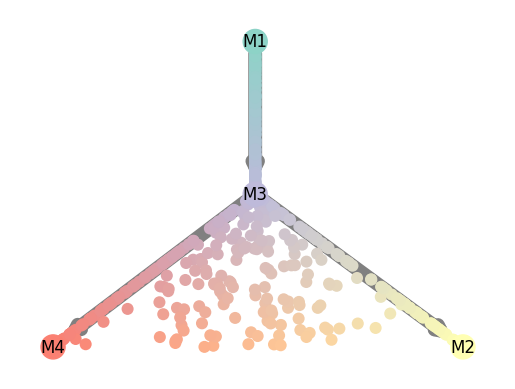

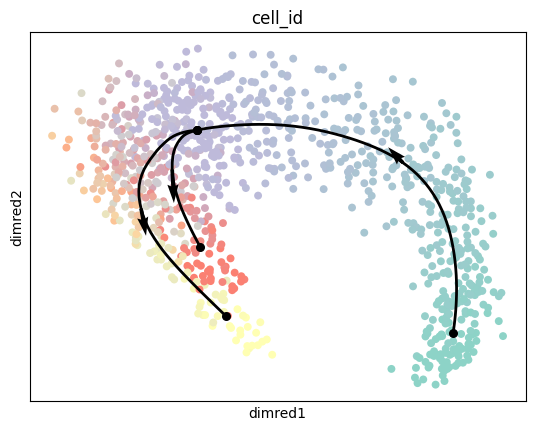

In [2]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="synthetic/dyntoy/bifurcating_1.rds")
# 直接可视化轨迹
pdv.plot.plot_graph(dataset)
pdv.plot.plot_dimred(dataset)
dataset

In [4]:
# 2. 选择方法(method)
methods_selected = [pdv.methods.ti_slingshot(), pdv.methods.ti_comp1()]
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月11日 17时08分16秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
[2025年01月11日 17时08分17秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_comp1:v0.9.9.01) loaded                                  
                        INFO     Methods [{'method': {'id': 'slingshot', 'name': 'Slingshot', 'source': 'tool',    
                                 'platform': 'R', 'license': 'Artistic-2.0', 'url':                                
                                 'https://github.com/kstreet13/slingshot', 'authors': [{'given': 'Kelly', 'family':
                                 'Street', 'email': 'street.kelly@gmail.com', 'github': 'kstreet13'}, {'given':    
                                 'Sandrine', 'family': 'Dudoit', 'email': 'sandrine@

In [5]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectories(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

[2025年01月11日 17时08分18秒] DEBUG    Temp wd: /tmp/tmpab0w72xz                                                   
                        DEBUG    Save json successfully, path: /tmp/tmpab0w72xz/input.json                         
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2025年01月11日 17时08分19秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmpab0w72xz/input.json', '--input_h5_filename',                       
                                       '/tmp/tmpab0w72xz/input.h5'], returncode=0, s

                        DEBUG    selecting waypoints                                                               
[2025年01月11日 17时09分24秒] DEBUG    selecting waypoints shape is (550, 926), finished!                          
                        INFO     Result plotting finished                                                          


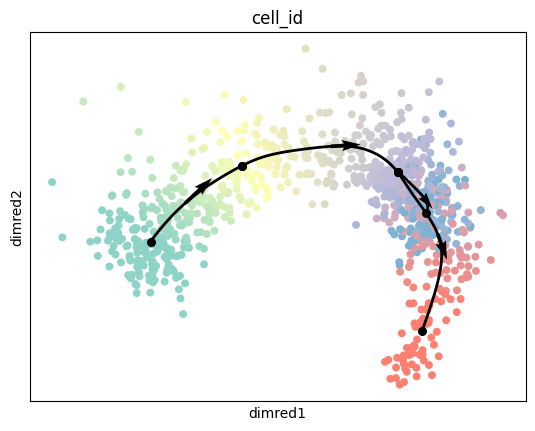

In [6]:
# 4. 绘制轨迹(dimred+plot)
# TODO: 保持维度一致
pdv.plot.plot_dimred(model[0]["model"], expression_source=dataset["expression"])
logger.info("Result plotting finished")

[2025年01月11日 17时09分25秒] DEBUG    selecting waypoints                                                         
[2025年01月11日 17时09分46秒] DEBUG    selecting waypoints shape is (201, 926), finished!                          
                        INFO     Result plotting finished                                                          


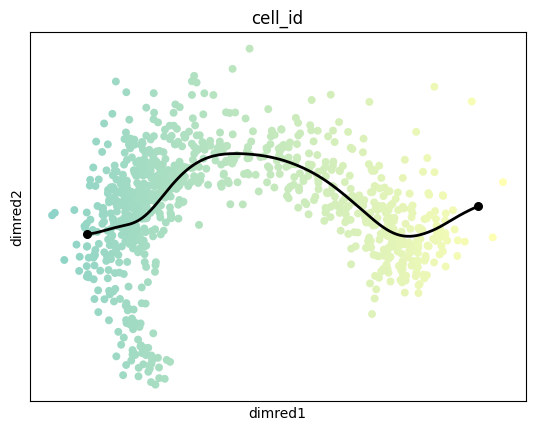

In [7]:
pdv.plot.plot_dimred(model[1]["model"], expression_source=dataset["expression"])
logger.info("Result plotting finished")